<a href="https://colab.research.google.com/github/akshar1277/Pytorch_learning/blob/main/03_Pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch computer vision

In [34]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [35]:
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, #do we want the training datasets
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to tranform the data ?
    target_transform=None, # how do we want to transform the labels

)

test_data=datasets.FashionMNIST(
    root="data", #where to download data to?
    train=False, #do we want the training datasets
    download=True,
    transform=ToTensor(), # how do we want to tranform the data ?
    target_transform=None, # how do we want to transform the labels

)

In [36]:
len(train_data)

60000

In [37]:
image,label=train_data[0]


In [38]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [40]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [41]:
#chek the shape of our image
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

## 1.2 visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

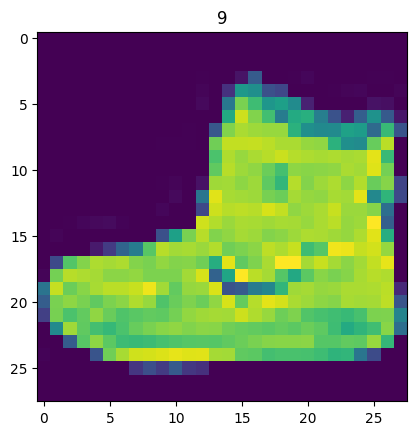

In [42]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

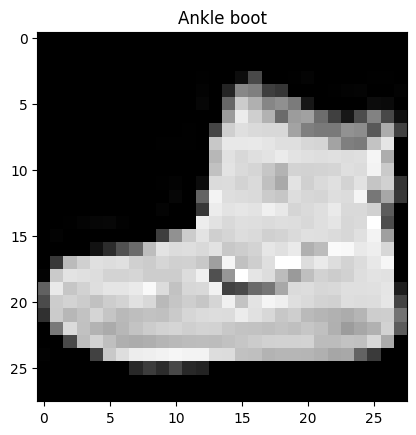

In [43]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])


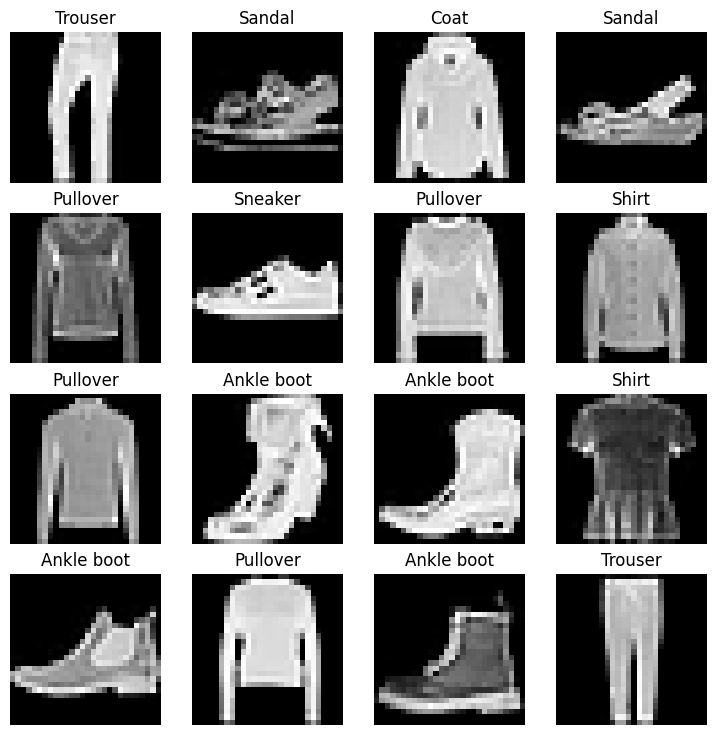

In [44]:
# plot more images
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows *cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



## 2 . prepare dataloader
right now our data is in the form of pytorch datasets.

DataLoader turns our dataset into a python iterable.

More specifically , we want to turn our data into batches ( or mini-batched)

why we do this ?

1. it is more computationally efficient as in your computing harware may not be able to look (store in memory) at 6oooo images in one hit. so we break it down to 32 images at a time .

2. It gives our neural network more chaces to update its gradients per epoch.


In [45]:
train_data


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [46]:
from torch.utils.data import DataLoader


#Setup the betch size hyperparameter
BATCH_SIZE=32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x79c3ea961ff0>,
 <torch.utils.data.dataloader.DataLoader at 0x79c3ea962020>)

In [47]:
print(f"length of train_dataloader:{len(train_dataloader)} betches of {BATCH_SIZE} ")

length of train_dataloader:1875 betches of 32 


In [48]:
# check out what's inside the training dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

iamge size,torch.Size([1, 28, 28])
Label:7, label size:torch.Size([])


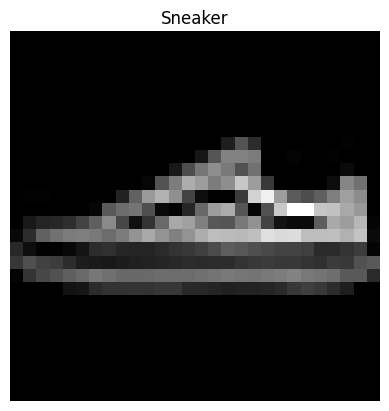

In [49]:
#  show a semple

torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img , label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"iamge size,{img.shape}")
print(f"Label:{label}, label size:{label.shape}")


###3. Model 0:Build basline model

In [52]:
# Create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x=train_features_batch[0]

# Flatten the sampel
output= flatten_model(x) # perfom forward pass

#print out what happendp
print(f"shape before flattening: {x.shape}  -> [color_channels,height,width]")
print(f"shape after flattening :{output.shape}->[color_chanels,height*width]")

shape before flattening: torch.Size([1, 28, 28])  -> [color_channels,height,width]
shape after flattening :torch.Size([1, 784])->[color_chanels,height*width]


In [53]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),

    )
  def forward(self,x):
    return self.layer_stack(x)



In [56]:
torch.manual_seed(42)
# setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=784, #this is 28*28
    hidden_units=10, #how many units in the hidden layer
    output_shape=len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [57]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [58]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 setup loss ,optimizer and evaluation metrics

* Loss function -since we are working with multi-class data our loss fucntion will be `nn.CrossEntropyLoss()`
* optimizer - out optimizer torch.optim.SGD()
* Evaluation metric - since we're working on a clssification problem let's use accuracy as our evalution metric

In [60]:

import requests
from pathlib import Path

# Download helper functions from Learn Pytorc repos

if Path("hepler_functions.py").is_file():
  print("helper funciton already exists ,skipping download")
else:
  print("Download helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



Download helper_functions.py


In [61]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


### 3. creating a function to time our experiments\



In [62]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):

  total_time=end-start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time


In [64]:
start_time=timer()

end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")


Train time on cpu:0.000 seconds


5.69200001336867e-05

### 3.3 creating a training loop based on the batches

1. Loop through epochs.
2. Loop through training batches , perform training steps , calculate the train loss *per batch*
3. Loop through testing batches ,k perform testing steps, calculate the test loss per batch
4. print out what's happening
5. Time it all

In [66]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

#set the nunmber of epochs(we'll keep this small for faster training time)

epochs=3

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")

  train_loss=0

  #ad a loop to loop through the training batches

  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred=model_0(x)

    loss=loss_fn(y_pred,y)

    train_loss+=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 ==0:
      print(f"Looked at{batch * len(x)}/{len(train_dataloader.dataset)} sampels")

  train_loss /=len(train_dataloader)

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      test_pred=model_0(x_test)

      test_loss +=loss_fn(test_pred,y_test)

      test_acc +=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss /=len(test_data)

    #calolculate the test acc average per batch

    test_acc /=len(test_dataloader)

  print(f"\n Train loss:{train_loss:.4f} | Test loss:{test_loss:.4f},Test acc:{test_acc}")

train_time_end_on_cpu=timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at0/60000 sampels
Looked at12800/60000 sampels
Looked at25600/60000 sampels
Looked at38400/60000 sampels
Looked at51200/60000 sampels

 Train loss:0.4440 | Test loss:0.0146,Test acc:83.64616613418531
Epoch: 1
----
Looked at0/60000 sampels
Looked at12800/60000 sampels
Looked at25600/60000 sampels
Looked at38400/60000 sampels
Looked at51200/60000 sampels

 Train loss:0.4366 | Test loss:0.0145,Test acc:83.88578274760384
Epoch: 2
----
Looked at0/60000 sampels
Looked at12800/60000 sampels
Looked at25600/60000 sampels
Looked at38400/60000 sampels
Looked at51200/60000 sampels

 Train loss:0.4305 | Test loss:0.0146,Test acc:83.92571884984025
Train time on cpu:24.870 seconds


### 4.Make Predictions and get MOdel 0 resuls

In [67]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      y_pred=model(x)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #scale loss and acc to find the averrage loss/acc per batch
    loss /=len(data_loader)
    acc /=len(data_loader)


  return {"model_name":model.__class__.__name__, #only works when model was ccreated with a class
          "model_loss":loss.item(),
          "model_acc":acc
          }

model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46593600511550903,
 'model_acc': 83.92571884984025}